In [1]:
import sys
sys.path.append('C:/Users/ug033207/dynamic scheduling/dynamic-scheduling/functions')
from point_rating import point_rating
from first_model import first_model
from dynamic_model import dynamic_model
from first_round_rating import first_round_rating

import random
from pyomo.environ import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time
import copy
import math




In [2]:

n= 20
p= 1
teams = list(range(1,n+1))
days = list(range(1,n))

days_dynamic = [x for x in days if x != 1]  # Removes all occurrences of 3
k = math.ceil((n - 1) / p)
rounds = [days_dynamic[i*p:((i+1)*p)] for i in range(k)]
rounds = list(filter(None, rounds))

solution_keeper = pd.DataFrame(columns=['Day', 'Team 1', 'Team 2'])
result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain first half')
result_df = pd.DataFrame(result_df)

#Spanish old ratings
#old_ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756,8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
#German old ratings
#old_ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}



objective_values = []


#random.seed(1)

In [3]:
excel_file_path = 'C:/Users/ug033207/solution.xlsx'
with pd.ExcelWriter(excel_file_path) as writer:

    solution_df = first_model(teams, days)
    print(solution_df)
    solution_keeper = pd.concat([solution_keeper, solution_df])

    ratings, ratings_df = first_round_rating(teams, solution_df, result_df)

    sheet_name = f'Solution_days{1}'.replace('[', '_').replace(']', '_')     
    solution_df.to_excel(writer, sheet_name=sheet_name)
    ratings_df.to_excel(writer, sheet_name=sheet_name + '_Ratings')

    for r in rounds:
        solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper, r)
        objective_values.append(obj_value)
        solution_keeper = pd.concat([solution_keeper, solution_df])
        ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df, r)
            
        sheet_name = f'Solution_days{r[0]}'.replace('[', '_').replace(']', '_')     
        solution_df.to_excel(writer, sheet_name=sheet_name)
        ratings_df.to_excel(writer, sheet_name=sheet_name + '_Ratings')


Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2023-12-14
Read LP format model from file C:\Users\ug033207\AppData\Local\Temp\tmp2y4zpt9b.pyomo.lp
Reading time = 0.05 seconds
x1: 950 rows, 7601 columns, 22040 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 950 rows, 7601 columns and 22040 nonzeros
Model fingerprint: 0x4a015d8a
Variable types: 1 continuous, 7600 integer (7600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 380 rows and 3991 columns
Presolve time: 0.04s
Presolved: 570 rows, 3610 columns, 10830 nonzeros

In [4]:

result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain second half')
result_df2 = pd.DataFrame(result_df2)

rounds2 = [days[i*p:((i+1)*p)] for i in range(k)]
rounds2 = list(filter(None, rounds2))
print(rounds2)

solution_keeper = pd.DataFrame(columns= solution_keeper.columns)

objective_values2 = []
for r2 in rounds2:
    solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper, r2)
    objective_values2.append(obj_value)
    solution_keeper = pd.concat([solution_keeper, solution_df])
    ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df2, r2)


[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]
Optimal solution found.
Team 2 vs Team 1 in Slot 1
Team 3 vs Team 7 in Slot 1
Team 5 vs Team 17 in Slot 1
Team 6 vs Team 4 in Slot 1
Team 10 vs Team 9 in Slot 1
Team 13 vs Team 16 in Slot 1
Team 15 vs Team 11 in Slot 1
Team 18 vs Team 12 in Slot 1
Team 19 vs Team 8 in Slot 1
Team 20 vs Team 14 in Slot 1
  Team 1 Team 2 Result
0      2      1      2
1      3      7      3
2      5     17      5
3      6      4    tie
4     10      9     10
5     13     16    tie
6     15     11    tie
7     18     12     18
8     19      8    tie
9     20     14     20
Optimal solution found.
Team 2 vs Team 7 in Slot 2
Team 3 vs Team 1 in Slot 2
Team 4 vs Team 19 in Slot 2
Team 6 vs Team 18 in Slot 2
Team 9 vs Team 13 in Slot 2
Team 10 vs Team 17 in Slot 2
Team 11 vs Team 16 in Slot 2
Team 12 vs Team 8 in Slot 2
Team 15 vs Team 14 in Slot 2
Team 20 vs Team 5 in Slot 2
  Team 1 Team 2 Result
0      2

[3.0, 4.0, 3.0, 9.0, 10.0, 7.0, 20.0, 28.0, 36.0, 41.0, 56.0, 72.0, 82.0, 95.0, 110.0, 116.0, 126.0, 141.0]
[  3.   4.   3.   9.  10.   7.  20.  28.  36.  41.  56.  72.  82.  95.
 110. 116. 126. 141.  27.  43.  41.  65.  79.  88.  90. 113. 131. 153.
 172. 186. 184. 185. 199. 215. 206. 220. 227.]
3583.0


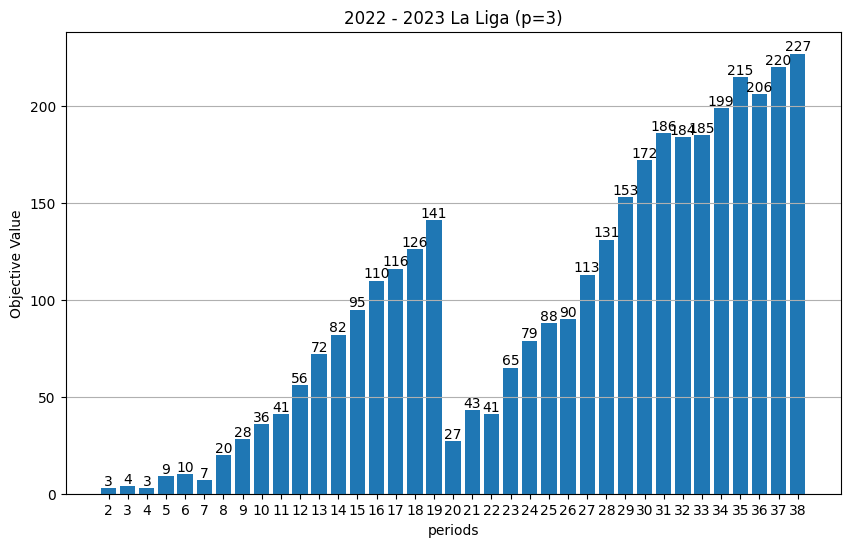

In [7]:
print(objective_values)
obje =  objective_values + objective_values2 

obje = np.array(obje)
print(obje)
print(sum(obje))


plt.figure(figsize=(10,6))
bars = plt.bar(range(len(obje)), obje)
plt.bar_label(bars)
plt.xlabel('periods')
plt.ylabel('Objective Value')
plt.title('2022 - 2023 La Liga (p=3)')

# Change the x-axis tick labels
new_tick_labels = [i for i in range(2,39)]  # New tick labels
plt.xticks(range(len(obje)), new_tick_labels)

plt.grid(axis='y')  # Show grid on the y-axis
#plt.ylim(0,700)
plt.show()